# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 14, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import some packages, add additional packages yourself when needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

## (a) 1 point
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

det(A) = -3 + 2 $\alpha^2$  - $\alpha$ - 3 = 2 $\alpha^2$  - $\alpha$ - 6


det(A) = 0 <=> $\alpha$ = 2 or $\alpha$ = -1.5

## (b) 1 point
For the largest value of $\alpha$ you found above, find a nonzero vector $b$ such that $Ax = b$ has infinitely many solutions. Explain your answer.

$\begin{bmatrix} 1 & -1 & 2 \\ 2 & 2 & 1 \\ 0 & 2& -3/2 \end{bmatrix}$

$Ax = b$ has infinitely many solutions if b ∈ span(A), therefore b can be equal to any linear combination o vectors   $\begin{bmatrix}1 \\ 2 \\ 0\end{bmatrix}$ and $\begin{bmatrix}-1 \\ 2 \\ 2\end{bmatrix}$ and $\begin{bmatrix} 0 \\ 2 \\ -3/2\end{bmatrix}$ for example  $\begin{bmatrix}1 \\ 2 \\ 0\end{bmatrix}$ or  $\begin{bmatrix}0 \\ 4 \\ 2\end{bmatrix}$

# Exercise 2

For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a) 2 points
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

(Make sure to import the necessary functions/packages.)

In [2]:
def invert(A):
    '''invert the matrix A'''
    # YOUR CODE HERE

## (b) 1 point
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?
Give a short calculation/explanation for your answer.

YOUR ANSWER HERE

# Exercise 3

## (a) (2 points) 
What happens when Gaussian elimination with partial pivoting is used on a matrix of the following form?
$$
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
    -1 &  1 &  0 &  0 &  1 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
$$
Do the entries of the transformed matrix grow? What happens if complete pivoting is used instead? (Note that part (a) does not require a computer.)


## (b) (2 points)
Write a method that generates a matrix of the form of part (a) of size $n \times n$ for any $n$. Use a library routine for Gaussian elimination with partial pivoting to solve various sizes of linear systems of this form, using right-hand-side vectors chosen so that the solution is known. Try for example the case where the true solution is a vector of uniformly distributed random numbers between 0 and 1. How do the error, residual, and condition number behave as the systems become larger? Comment on the stability (see chapter 1) of Gaussian elimination with partial pivoting in this case.

N.B. This is an artificially contrived system that does not reflect the behavior of Gaussian elimination in realistic examples.

<ipython-input-34-51a32d3310b2>:24: RuntimeWarning: overflow encountered in subtract
  a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
<ipython-input-34-51a32d3310b2>:26: RuntimeWarning: overflow encountered in subtract
  b[i] = b[i] - lam*b[k]
<ipython-input-34-51a32d3310b2>:29: RuntimeWarning: invalid value encountered in true_divide
  b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]


[1.7430501486614958e-14, 25.60334355780861, 475.7551166038843, nan] [626.2842004905187, 7.666211969861741e+29, 3.250172620784983e+300, nan] [13695.21707571133, 1.2102038835275693e+45, inf, inf]


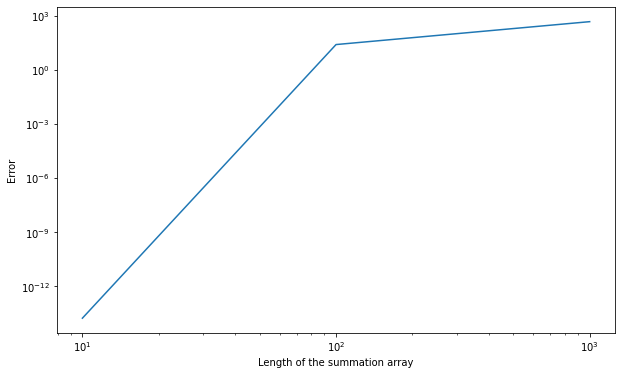

In [34]:
import numpy as np
import scipy as sp
import scipy.linalg as sla
import matplotlib.pyplot as plt
def gen(n):
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if j < i:
                M[i][j] = -1
            elif j == i or j == n-1:
                M[i][j] = 1
    return M
    
def gaussElim(a,b):
    n = len(b)
    # Elimination phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                #if not null define λ
                lam = a [i,k]/a[k,k]
                #we calculate the new row of the matrix
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                #we update vector b
                b[i] = b[i] - lam*b[k]
                # backward substitution
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b


rand_sol = np.random.rand(9,1)
A = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 0]])
b = np.array([1, 2, 3])


trial = gen(9)
b = trial.dot(rand_vec)




def compere(n):
    trial = gen(n)
    rand_sol = np.random.rand(n,1)
    b = trial.dot(rand_sol)
    gaus_sol = gaussElim(trial, b)
    error = np.sum(np.abs(rand_sol - gaus_sol))
    resid = np.sum(np.abs(b - trial.dot(gaus_sol)))
    cond_num = np.linalg.cond(trial)
    return error,resid, cond_num
    
N_pow = [10,10**2,10**3]
error = []
resid = []
cond_num = []
for i in N_pow:
    res = compere(i)
    error.append(res[0])
    resid.append(res[1])
    cond_num.append(res[2])
print(error, resid, cond_num)
plt.figure(figsize=(10, 6))
plt.loglog(N_pow, error)
#plt.loglog(N_pow, resid)
#plt.loglog(N_pow, cond_num)

plt.xlabel('Length of the summation array')
plt.ylabel('Error')
plt.show()